# Oppgaver – Ikke-lineære likninger

---

## Oppgaver for hånd

---

### Oppgave 1 – Estimering med ulike metoder

Estimer en løsning til likningen  

$x = x \ln(x)$

ved å bruke:

1. Midtpunktsmetoden (bisection) i 2–3 steg med et startintervall du velger.  
2. Fix-punkts iterasjon i 2–3 steg med startverdi $x_0=1$.  
3. Newtons metode i 2–3 steg med startverdi $x_0=1$.  

Skriv ned alle mellomregninger.

---

### Oppgave 2 – Fix-punkts iterasjon for $\sqrt{2}$

Vis at $x^2=2$ kan skrives som:

$x = \frac{1}{2}\left(x + \frac{2}{x}\right)$

Bruk fix-punkts iterasjon for å estimere $\sqrt{2}$ ved å løse  

- Start med $x_0 = 1$  
- Utfør 3–4 iterasjoner  
- Skriv alle mellomregninger  

---

### Oppgave 3 – Newtons metode med ikke-konvergens

Bruk Newtons metode på likningen  

$f(x) = 4x^4 - 6x^2 - \frac{11}{4} = 0$

med startverdi $x_0 = 0.5$.  

- Utfør 3 iterasjoner  
- Forklar hvorfor metoden hopper frem og tilbake mellom $0.5$ og $-0.5$.  

---

### Oppgave 4 – Konvergensrate

Utled formelen for konvergensraten til Newtons metode:  

$e_{n+1} \approx C e_n^2$

der $e_n$ er feilen etter n-te iterasjon.  

**Hint for stegvis løsning:**

- Definer feilen $e_n = x_n - x^*$. Hvor $x^*$ er den korrekte løsningen. 
- Sett uttrykket for $x_n$ inn i Newtons metode.
- Finn Taylor-utviklingen til $f(x^*+e_n)$ og $f'(x^*+e_n)$ og putt det inn i Newtons metode.
- Bruk at $f(x^*)=0$ fordi $x^*$ er løsningen. 
- Utled konvergensraten fra rekursjonen.

---

## Digitale oppgaver

---

### Oppgave 5 – Midtpunktsmetoden

a) Implementer midtpunktsmetoden i Python for en funksjon $f(x)=-\frac{1}{10}x^3+\frac{1}{30}x^2-\frac{1}{10}x+\frac{1}{30}=0$.  

- Gi funksjonen, startintervallet $[0,1]$, et maksimalt antall steg, og en toleranse $\varepsilon=10^{-5}$.  

b) Bruk metoden for å finne løsningen av $f(x) = 0$.  

- Beregn feilen $|x_n - x^*|$ for hvert steg. ($x^*=0.5$) 

c) Hvor mange steg bruker metoden på å nå feilen $\varepsilon$?

d) Plot forholdet mellom feilene $e_{i+1}/e_i$ og estimer konvergensraten.  (Bruk `plt.plot(y)`)

(Hvis en metode er førsteordens betyr det at $e_{i+1}=C e_{i}$. Altså så burde $e_{i+1}/e_{i}=C$)




x=0.3333282470703125 er den approksimerte løningen
Feilen er 7.62939453125e-06 og det tok 16 iterasjoner og komme dit


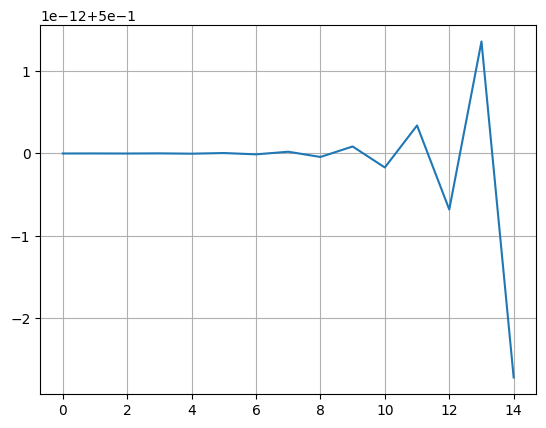

In [58]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -0.1*x**3 + 1/30*x**2 - 0.1*x + 1/30

a = 0
b = 1

n_max = 100
epsilon = 10**-5

i = 0
feil = (b-a)/2

alle_feil = []

while i < n_max and feil > epsilon:

    # Finner fortegnet til f(a) og f(b)
    fa = f(a)
    fb = f(b)

    # Finner midtpunktet av a og b
    c = (b-a)/2 + a 

    # Finner funksjonsverdien der
    fc = f(c)

    if fa*fb > 0:
        print("f(a) og f(b) kan ikke ha samme fortegn!")
        break

    if fa*fc > 0:
        a = c 
    elif fb*fc > 0:
        b = c 
    elif fc == 0:
        print(f"x={c} er den nøyaktige løsningen til maskinpresisjon")
        break
    
    feil = (b-a)/2
    i += 1

    alle_feil.append(abs(c-1/3))
    

print(f"x={c} er den approksimerte løningen")
print(f"Feilen er {feil} og det tok {i} iterasjoner og komme dit")


alle_feil = np.array(alle_feil)
plt.plot(alle_feil[1:]/alle_feil[:-1])
plt.grid()


### Oppgave 6 – Fix-punktsmetoden

a) Implementer fix-punktsmetoden i Python for samme funksjon som over $f(x)=-\frac{1}{10}x^3+\frac{1}{30}x^2-\frac{1}{10}x+\frac{1}{30}=0$.  .  

- Gi funksjonen, startintervallet $[0,1]$, et maksimalt antall steg, og en toleranse $\varepsilon=10^{-5}$.  

b) Bruk metoden for å finne løsningen av $f(x) = 0$.  

- Beregn feilen $|x_n - x^*|$ for hvert steg. ($x^*=0.5$) 

c) Hvor mange steg bruker metoden på å nå feilen $\varepsilon$?

d) Plot forholdet mellom feilene $e_{i+1}/e_i$ og estimer konvergensraten.  (Bruk `plt.plot(y)`)

(Hvis en metode er førsteordens betyr det at $e_{i+1}=C e_{i}$. Altså så burde $e_{i+1}/e_{i}=C$)





x=0.33332343174837986 er den approksimerte løningen
Feilen er 9.90158495345339e-06 og det tok 90 iterasjoner og komme dit


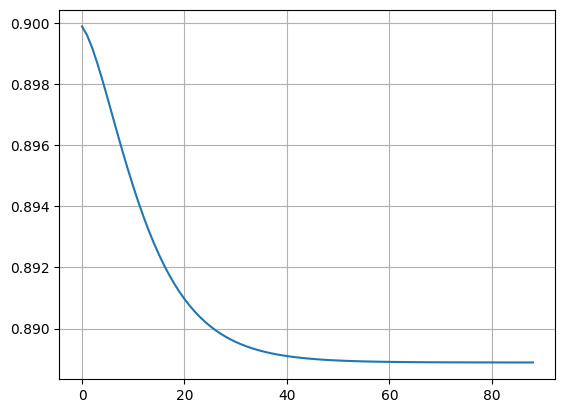

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -0.1*x**3 + 1/30*x**2 + 0.9*x + 1/30 # Merk at denne endres litt fordi vi skal løse x = f(x)

x0 = 0

n_max = 100
epsilon = 10**-5

i = 0
feil = 1 # Tilfeldig verdi til å starte med

alle_feil = []

while i < n_max and feil > epsilon:

    x = f(x0)
    
    feil = abs(x - 1/3)
    i += 1
    x0 = x

    alle_feil.append(feil)
    

print(f"x={x} er den approksimerte løningen")
print(f"Feilen er {feil} og det tok {i} iterasjoner og komme dit")


alle_feil = np.array(alle_feil)
plt.plot(alle_feil[1:]/alle_feil[:-1])
plt.grid()


### Oppgave 7 – Newtons metode

a) Implementer Newtons metode i Python for samme funksjon som over $f(x)=-\frac{1}{10}x^3+\frac{1}{30}x^2-\frac{1}{10}x+\frac{1}{30}=0$.  

- Gi funksjonen, startverdi $x_0=1$, et maksimalt antall steg, og en toleranse $\varepsilon=10^{-10}$.  

b) Bruk metoden for å finne løsningen av $f(x) = 0$.  

- Beregn feilen $|x_n - x^*|$ for hvert steg. ($x^*=0.5$) 

c) Hvor mange steg bruker metoden på å nå feilen $\varepsilon$?

d) Plot forholdet mellom feilene $e_{i+1}/e_i^2$ og estimer konvergensraten.  (Bruk `plt.plot(y)`)

(Hvis en metode er andreordens betyr det at $e_{i+1}=C e_{i}^2$. Altså så burde $e_{i+1}/e_{i}^2=C$)


x=0.33333333333502513 er den approksimerte løningen
Feilen er 1.6918133560750448e-12 og det tok 5 iterasjoner og komme dit


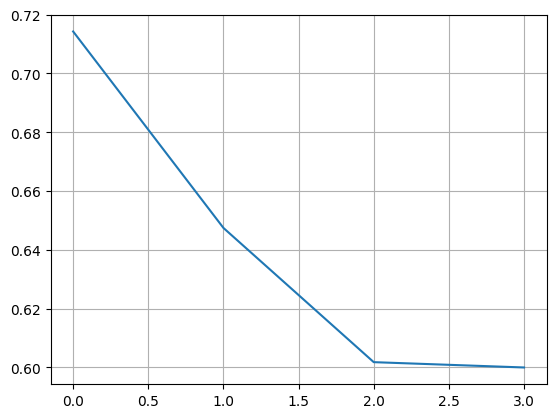

In [60]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return -0.1*x**3 + 1/30*x**2 - 0.1*x + 1/30 

def fd(x):
    return -0.3*x**2 + 2/30*x - 0.1

x0 = 1

n_max = 100
epsilon = 10**-10

i = 0
feil = 1 # Tilfeldig verdi til å starte med

alle_feil = []

while i < n_max and feil > epsilon:

    x = x0 - f(x0)/fd(x0)
    
    feil = abs(x - 1/3)
    i += 1
    x0 = x

    alle_feil.append(feil)
    

print(f"x={x} er den approksimerte løningen")
print(f"Feilen er {feil} og det tok {i} iterasjoner og komme dit")


alle_feil = np.array(alle_feil)
plt.plot(alle_feil[1:]/alle_feil[:-1]**2)
plt.grid()


### Oppgave 8 – Newtons metode med kvadratfunksjon

Bruk Newtons metode på $f(x) = x^2.$

- Start med $x_0 = 0.1$
- Beregn feilen $|x_n - x^*|$ for hver iterasjon.  
- Plot feilen vs antall steg og forklar konvergensraten (lineær eller kvadratisk).


x=9.313225746154784e-11 er den approksimerte løningen
Feilen er 9.313225746154784e-11 og det tok 30 iterasjoner og komme dit


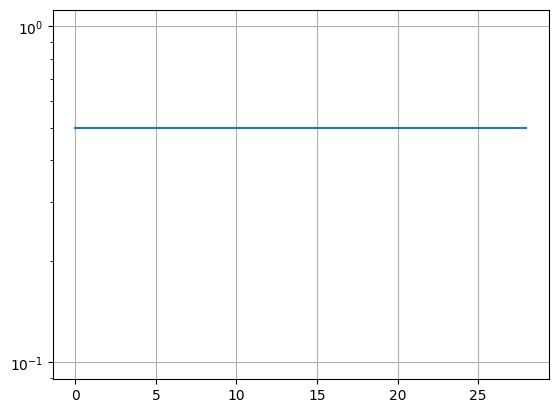

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**2

def fd(x):
    return 2*x

x0 = 0.1

n_max = 100
epsilon = 10**-10

i = 0
feil = 1 # Tilfeldig verdi til å starte med

alle_feil = []

while i < n_max and feil > epsilon:

    x = x0 - f(x0)/fd(x0)
    
    feil = abs(x)
    i += 1
    x0 = x

    alle_feil.append(feil)
    

print(f"x={x} er den approksimerte løningen")
print(f"Feilen er {feil} og det tok {i} iterasjoner og komme dit")


alle_feil = np.array(alle_feil)
plt.semilogy(alle_feil[1:]/alle_feil[:-1])
plt.grid()


### Oppgave 9 – Bølgelengde i havet

For bølger på havet er sammenhengen mellom perioden $T$ og bølgelengden $L$ gitt med den såkalte dispersjonsrelasjonen:  

$\omega^2 = g k \tanh(k h)$

der  

$\omega = \frac{2 \pi}{T}$ er vinkelhastigheten, $k = \frac{2 \pi}{L}$ er bølgetallet, $g = 9.81$m/s^2 er tyngeakselerasjonen og $h$ er vanndybden.

- Beregn bølgelengden $L$ for en bølge med periode $T = 7 \, \mathrm{s}$ og dybde $h = 100 \, \mathrm{m}$. 
- Gjenta for $h = 10 \, \mathrm{m}$, $5 \, \mathrm{m}$, og $1 \, \mathrm{m}$.  

**Hint:** Bruk en ikke-lineær solver (f.eks. Newtons metode) i Python for å løse ligningen for $k$.  

In [72]:
import matplotlib.pyplot as plt
import numpy as np

def f(o, k, g, h):
    return g*k*np.tanh(k*h) - o**2

def fd(o, k, g, h):
    return g*np.tanh(k*h) + h*k/(np.cosh(k*h)**2)

n_max = 100
epsilon = 10**-10

g = 9.81
T = 7
o = 2*np.pi/T
h = 100


L0 = 100
k0 = 2*np.pi/L0

i = 0
feil = 1 # Tilfeldig verdi til å starte med
alle_feil = []

while i < n_max and feil > epsilon:

    k = k0 - f(o, k0, g, h)/fd(o, k0, g, h)
    
    feil = abs(k-k0)
    i += 1
    k0 = k
    

L = 2*np.pi/k

print(f"L={L}m er den approksimerte løningen")
print(f"Feilen er {feil} og det tok {i} iterasjoner og komme dit")



L=76.50417834592378m er den approksimerte løningen
Feilen er 8.422845754196828e-13 og det tok 3 iterasjoner og komme dit
